## Task 1 - Go-To-Market Proposal

#### Introduction

Our Company has a Go-to-Market (GTM) team that is split into the following sub-teams:
- Sales Development Representative (SDR): Qualifies incoming prospects and schedules a first meeting with an Account Executive.
- Account Executive (AE): Aligns prospect needs with Our Company’s solution and coordinates internal resources to close the first deal. From then on, maintains the commercial relationship with the Client for future upsells and renewals.
- Sales Engineer (SE): Assists the AE with technical qualification and validation of the sale, including, product demonstrations, integration diagrams, and Proof of Concepts / Pilots.
- Technical Account Manager: Manages new client onboarding, specifically the initial technical integration and use case implementation. Assist with technical requests and technical issues.
- Customer Success Management (CSM): Provides ongoing management of the Client after the initial sales for any non-sales related topics: supports the client in using Our Company, monitors product usage, adoption and knowledge, and helps the client grow and reach their goals.

**The VP of Sales** would like to know how our territories and AEs performed last year. 

Go-to-market Strategy: Our Company is about to close out Q1 2023 and begin planning for Q2 2023. We’d like to optimise our go-to-market message and tactics against the best performing segments of Prospects. Given the information provided, where would you recommend we focus our resources next quarter and why? Which source and sales team or rep is performing and their trends ? please provide your in sights and capture the areas of improvement 

Misc: Does this data inspire any other questions, observations or suggestions?

<br>

**Details:**

Primary lead source channels:
>Inbound – Opportunities created from inbound inquiries via the Website
>Outbound – Opportunities created by AEs, reaching out to Prospects to generate interest
>Partner Referrals – Opportunities referred by our Partners who believe their customers will benefit from using Our Company

The Sales team consists of 3 Regional Directors of Sales and their Account Executives:
> AEs 1, 2 and 3 fall under Director of Sales 1, who oversees the APAC territory
> AEs 4, 5, 6 and 7 fall under Director of Sales 2, who oversees the EMEA territory
> AEs 8, 9, 10, 11 and Misc. Rep fall under Director of Sales 3, who oversees the AMER territory
> Reps who are no longer in their seats are labelled “Misc. Rep”


### Pre-processing

<img src="image-20231125-144948.png" width="100%" align="left" />

In [ ]:
reduced = _deepnote_execute_sql('SELECT \n    "Opportunity ID" AS \'opportunity_id\'\n    ,"Company ID" AS \'company_id\'\n    ,"Opportunity Owner" AS \'opportunity_owner\'\n    ,"Amount (converted)" AS \'opportunity_value\'\n    ,"Stage" AS \'stage\'\n    ,"Created Date" AS \'created_date\'\n    ,"Close Date" AS \'close_date\'\n    ,"Sales Opportunity Age" AS \'opportunity_age\'\n    ,"Lead Source" AS \'lead_source\'\n    ,"Industry" AS \'industry\'\nFROM \'Case_Study_Data -For_Task_2 - Opportunity.csv\' \nLEFT JOIN \'Case_Study_Data -For_Task_2 - Accounts.csv\' on "Company ID 18 Digits" = "Company ID"', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
reduced

,opportunity_id,company_id,opportunity_owner,opportunity_value,stage,created_date,close_date,opportunity_age,lead_source,industry
0,00606000012b3w0,0010600001z3DY6AAM,AE 6,4235.35,Closed Lost,2022-01-06,2022-02-02,27,Inbound,Agencies / Consultancies / Software Providers ...
1,00606000012b4o2,0010600001z3H4OAAU,AE 11,9500.00,Closed Lost,2022-01-07,2023-03-08,425,Inbound,Wellness & Fitness
2,00606000012b4ix,0010600001z3GknAAE,Executive 1,6633.00,Scoping,2022-01-07,2022-03-31,446,Inbound,Food & Beverage
3,00606000012b5Dq,0010600001z3JW4AAM,AE 6,5811.50,Closed Lost,2022-01-08,2023-02-04,392,Partner Referral,Other Consumer Goods
4,00606000012b4vX,0010600001z3IFzAAM,AE 5,4000.00,Closed Won,2022-01-08,2022-02-07,30,Inbound,Food & Beverage - Delivery Services
...,...,...,...,...,...,...,...,...,...,...
470,00606000014uceo,00106000020u47gAAA,AE 8,2000.00,Closed Won,2022-10-12,2022-10-13,1,Inbound,Financial Services
471,00606000014ujqm,00106000023PUuKAAW,AE 4,69738.00,Proving,2022-10-29,2023-06-30,151,Inbound,None
472,00606000014uwLS,0010600002482fpAAA,AE 8,108000.00,Closed Lost,2022-11-23,2023-02-17,85,Inbound,hospitality
473,00606000014uwWQ,0010600002483uuAAA,AE 6,1743.45,Closed Lost,2022-11-24,2022-12-15,21,Inbound,online media


In [ ]:
df = _deepnote_execute_sql('SELECT \n    opportunity_id\n    , company_id\n    , opportunity_owner\n    , opportunity_value\n    , stage\n    , created_date\n    , close_date\n    , opportunity_age\n    , industry\n    , CASE\n    WHEN lower(industry) like lower(\'%Goods%\')                                         THEN \'Durables & Apparel\'\n    WHEN lower(industry) like lower(\'%Clothes%\')                                       THEN \'Durables & Apparel\'\n    WHEN lower(industry) like lower(\'%Textile%\')                                       THEN \'Durables & Apparel\'\n    WHEN lower(industry) like lower(\'%furniture%\')                                     THEN \'Durables & Apparel\'\n    WHEN lower(industry) like lower(\'%Cosmetics%\')                                     THEN \'Durables & Apparel\'\n    WHEN lower(industry) like lower(\'%Apparel%\')                                       THEN \'Durables & Apparel\'\n    WHEN lower(industry) like lower(\'%Electronics%\')                                   THEN \'Durables & Apparel\'\n\n    WHEN lower(industry) like lower(\'%Banking%\')                                       THEN \'Financial Services\'\n    WHEN lower(industry) like lower(\'%Financ%\')                                        THEN \'Financial Services\'\n\n    WHEN lower(industry) like lower(\'%Gambling%\')                                      THEN \'Services\'\n    WHEN lower(industry) like lower(\'%services%\')                                      THEN \'Services\'\n    WHEN lower(industry) like lower(\'%Gaming%\')                                        THEN \'Services\'\n    WHEN lower(industry) like lower(\'%Wellness%\')                                      THEN \'Services\'\n    WHEN lower(industry) like lower(\'%restaurants%\')                                   THEN \'Services\'\n    WHEN lower(industry) like lower(\'%Agenci%\')                                        THEN \'Services\'\n    WHEN lower(industry) like lower(\'%Platforms%\')                                     THEN \'Services\'\n    WHEN lower(industry) like lower(\'%recruiting%\')                                    THEN \'Services\'\n    WHEN lower(industry) like lower(\'%Real Estate%\')                                   THEN \'Services\'\n\n    WHEN lower(industry) like lower(\'%Telecommunication%\')                             THEN \'Telecommunication\'\n    WHEN lower(industry) like lower(\'%media%\')                                         THEN \'Telecommunication\'\n    WHEN lower(industry) like lower(\'%advertising%\')                                   THEN \'Telecommunication\'\n    WHEN lower(industry) like lower(\'%publishing%\')                                    THEN \'Telecommunication\'\n\n    WHEN lower(industry) like lower(\'%utilities%\')                                     THEN \'Utilities\'\n\n    WHEN lower(industry) like lower(\'%Mobility%\')                                      THEN \'Transportation & Logistics\'\n    WHEN lower(industry) like lower(\'%Transportation%\')                                THEN \'Transportation & Logistics\'\n    WHEN lower(industry) like lower(\'%Travel%\')                                        THEN \'Transportation & Logistics\'\n    WHEN lower(industry) like lower(\'%Airline%\')                                       THEN \'Transportation & Logistics\'\n    WHEN lower(industry) like lower(\'%logistic%\')                                      THEN \'Transportation & Logistics\'\n\n    WHEN lower(industry) like lower(\'%Marketplace%\')                                   THEN \'Information Technology\'\n    WHEN lower(industry) like lower(\'%Internet%\')                                      THEN \'Information Technology\'\n    WHEN lower(industry) like lower(\'%Technology%\')                                    THEN \'Information Technology\'\n    WHEN lower(industry) like lower(\'%software%\')                                      THEN \'Information Technology\'\n    WHEN lower(industry) like lower(\'%ecommerce%\')                                     THEN \'Information Technology\'\n    WHEN lower(industry) like lower(\'%e-%\')                                            THEN \'Information Technology\'\n    WHEN lower(industry) like lower(\'%security%\')                                      THEN \'Information Technology\'\n    WHEN lower(industry) like lower(\'%computer%\')                                      THEN \'Information Technology\'\n\n    WHEN lower(industry) like lower(\'%Grocery Shops%\')                                 THEN \'Retail\'\n    WHEN lower(industry) like lower(\'%Retail%\')                                        THEN \'Retail\'\n\n    WHEN lower(industry) like lower(\'%medical%\')                                       THEN \'Health Care\'\n    WHEN lower(industry) like lower(\'%Health%\')                                        THEN \'Health Care \'\n    WHEN lower(industry) like lower(\'%pharmaceutical%\')                                THEN \'Health Care \'\n\n    WHEN lower(industry) like lower(\'%arts%\')                                          THEN \'Arts & Entertainment\'\n    WHEN lower(industry) like lower(\'%music%\')                                         THEN \'Arts & Entertainment\'\n    WHEN lower(industry) like lower(\'%Entertainment%\')                                 THEN \'Arts & Entertainment\'\n\n    WHEN lower(industry) like lower(\'%Food%\')                                          THEN \'Food, Beverage & Tobacco\'\n    WHEN lower(industry) like lower(\'%Beverage%\')                                      THEN \'Food, Beverage & Tobacco\'\n    WHEN lower(industry) like lower(\'%tobacco%\')                                       THEN \'Food, Beverage & Tobacco\'\n    WHEN lower(industry) like lower(\'%wine%\')                                          THEN \'Food, Beverage & Tobacco\'\n\n    WHEN lower(industry) like lower(\'%Hospitality%\')                                   THEN \'Hospitality\'\n    WHEN lower(industry) like lower(\'%Insurance%\')                                     THEN \'Insurance\'\n\n    WHEN lower(industry) like lower(\'%automotive%\')                                    THEN \'Automotive\'\n    WHEN industry IS NULL                                                              THEN \'NA\'\n    ELSE \'Other\' END AS \'industry_group\'\n\n    , CASE \n        WHEN lead_source in (\'Customer Referral\', \'Employee Referral\',\'Partner Referral\') THEN \'Referral\'\n        WHEN lead_source in (\'Drift\', \'None\', \'Other\') THEN \'Other\' \n        ELSE lead_source END AS lead_source\n    , CASE WHEN opportunity_owner IN (\'AE 1\', \'AE 2\', \'AE 3\', \'Director of Sales 1\') THEN \'dir_1\'\n        WHEN opportunity_owner IN (\'AE 4\', \'AE 5\', \'AE 6\', \'AE 7\', \'Director of Sales 2\') THEN \'dir_2\'\n        WHEN opportunity_owner IN (\'AE 8\', \'AE 9\', \'AE 10\', \'AE 11\', \'Director of Sales 3\', \'Misc. Re\') THEN \'dir_3\'\n        ELSE opportunity_owner END AS \'director\'\n    , CASE WHEN opportunity_owner IN (\'AE 1\', \'AE 2\', \'AE 3\', \'Director of Sales 1\') THEN \'APAC\'\n        WHEN opportunity_owner IN (\'AE 4\', \'AE 5\', \'AE 6\', \'AE 7\', \'Director of Sales 2\') THEN \'EMEA\'\n        WHEN opportunity_owner IN (\'AE 8\', \'AE 9\', \'AE 10\', \'AE 11\', \'Director of Sales 3\', \'Misc. Rep\') THEN \'AMER\'\n        ELSE opportunity_owner END AS \'Territory\'        \nFROM reduced\nWHERE opportunity_value > 0', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df

,opportunity_id,company_id,opportunity_owner,opportunity_value,stage,created_date,close_date,opportunity_age,industry,industry_group,lead_source,director,Territory
0,00606000012b3w0,0010600001z3DY6AAM,AE 6,4235.35,Closed Lost,2022-01-06,2022-02-02,27,Agencies / Consultancies / Software Providers ...,Services,Inbound,dir_2,EMEA
1,00606000012b4o2,0010600001z3H4OAAU,AE 11,9500.00,Closed Lost,2022-01-07,2023-03-08,425,Wellness & Fitness,Services,Inbound,dir_3,AMER
2,00606000012b4ix,0010600001z3GknAAE,Executive 1,6633.00,Scoping,2022-01-07,2022-03-31,446,Food & Beverage,"Food, Beverage & Tobacco",Inbound,Executive 1,Executive 1
3,00606000012b5Dq,0010600001z3JW4AAM,AE 6,5811.50,Closed Lost,2022-01-08,2023-02-04,392,Other Consumer Goods,Durables & Apparel,Referral,dir_2,EMEA
4,00606000012b4vX,0010600001z3IFzAAM,AE 5,4000.00,Closed Won,2022-01-08,2022-02-07,30,Food & Beverage - Delivery Services,Services,Inbound,dir_2,EMEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,00606000014uceo,00106000020u47gAAA,AE 8,2000.00,Closed Won,2022-10-12,2022-10-13,1,Financial Services,Financial Services,Inbound,dir_3,AMER
455,00606000014ujqm,00106000023PUuKAAW,AE 4,69738.00,Proving,2022-10-29,2023-06-30,151,None,NA,Inbound,dir_2,EMEA
456,00606000014uwLS,0010600002482fpAAA,AE 8,108000.00,Closed Lost,2022-11-23,2023-02-17,85,hospitality,Hospitality,Inbound,dir_3,AMER
457,00606000014uwWQ,0010600002483uuAAA,AE 6,1743.45,Closed Lost,2022-11-24,2022-12-15,21,online media,Telecommunication,Inbound,dir_2,EMEA


### Overview

-> Varied conversion rates exist across different industry groups, going from 0 to around 70%.

-> Since we don't have access to information on future market conditions, and internal strategic priorities, the considerations for next quarter's focus should encompass high-performing segments such as Durables and apparel, Services, and Financial services.

-> Inbound channels dominate, constituting 69.53% of total opportunity value and displaying a growth trend, even though its conversion rate hasn't always been good.

-> EMEA leads in income opportunity value but trails behind AMER in conversion rates.

-> A notable observation is that 20.27% of all incoming opportunities originate from a single employee.

-> Open opportunities have a considerably higher Average value, suggesting that bigger opportunities take longer to close (either close won or close lost)

-> The big discrepancies in performance among team members may signal an issue in knowledge management.

### Analysis in detail

### Segment

<img src="image-20231124-155223.png" width="75%" align="" />

---

In [ ]:
closing_by_industry = df[df['stage'].isin(['Closed Won', 'Closed Lost'])].groupby(['stage', 'industry_group']).sum()['opportunity_value'].unstack(level=0)
closing_by_industry = closing_by_industry.rename(columns={"Closed Won": "closed_won", "Closed Lost": "closed_lost"})
closing_by_industry['conversion_rate'] = closing_by_industry['closed_won'] / (closing_by_industry['closed_lost'] + closing_by_industry['closed_won'])
print(closing_by_industry.sort_values('conversion_rate', ascending=False))

stage                       closed_lost  closed_won  conversion_rate
industry_group                                                      
Food, Beverage & Tobacco       54595.70   142477.81         0.722968
Insurance                       4522.50     9173.80         0.669801
Health Care                    23236.40    43986.50         0.654338
Durables & Apparel            610486.10   369346.82         0.376949
Utilities                       6689.20     3000.00         0.309623
Services                      781633.15   148898.21         0.160014
Retail                        317307.20    36278.85         0.102603
Financial Services            526792.74    53250.00         0.091804
Transportation & Logistics    127781.25    11874.90         0.085030
Other                          98375.20     8649.32         0.080816
NA                            579723.36    47597.66         0.075874
Information Technology        458621.25    37362.05         0.075329
Arts & Entertainment           311

***The conversion rate for different industry groups has a large variance***
While the service sector holds the highest opportunity value, the 'Durables & Apparel' industry group has emerged as the top performer in generating value from closed opportunities. Following closely are the 'Services' and 'Food, Beverage & Tobacco' segments, solidifying their positions as the next most successful sectors.


***The factors to consider when selecting a focus for next quarter might include:***

- Current high-performing segments
- Future market conditions and predictions 
- Internal strategic direction and focus areas 

Since we don't have future market predictions or internal strategic directions available on this platform, the recommendation is based solely on the top 3 performing segments (Durables & Apparel, Services, Food, Beverage & Tobacco), as these segments have proven to generate the highest won opportunity value.

---

### Source

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt

df['created_date'] = pd.to_datetime(df['created_date'])
df['month'] = df['created_date'].dt.to_period('M')
df_filtered = df[(df['lead_source'] != 'Other') & (df['stage'].isin(['Closed Won', 'Closed Lost']))]
conversion_rate = df_filtered.pivot_table(index=['month', 'lead_source'], columns=['stage'], values='opportunity_value', aggfunc=np.sum).reset_index()

conversion_rate['conversion_rate'] = (conversion_rate['Closed Won'] / (conversion_rate['Closed Won'] + conversion_rate['Closed Lost']) *100).round(2)

conversion_rate = conversion_rate[['month', 'lead_source', 'conversion_rate']]
conversion_rate = conversion_rate.pivot_table(index=['month'], columns=['lead_source'], values='conversion_rate',fill_value=0).reset_index()

conversion_rate

lead_source,month,Inbound,Outbound,Referral
0,2022-01,16.09,0.00,0.00
1,2022-02,56.48,0.00,45.55
2,2022-03,27.59,26.27,0.00
3,2022-04,3.33,0.00,63.03
4,2022-05,18.01,0.00,0.00
5,2022-06,11.29,96.80,63.05
6,2022-07,21.70,0.00,4.11
7,2022-08,32.46,0.00,59.80
8,2022-09,1.83,42.55,0.00
9,2022-10,23.05,0.00,58.33


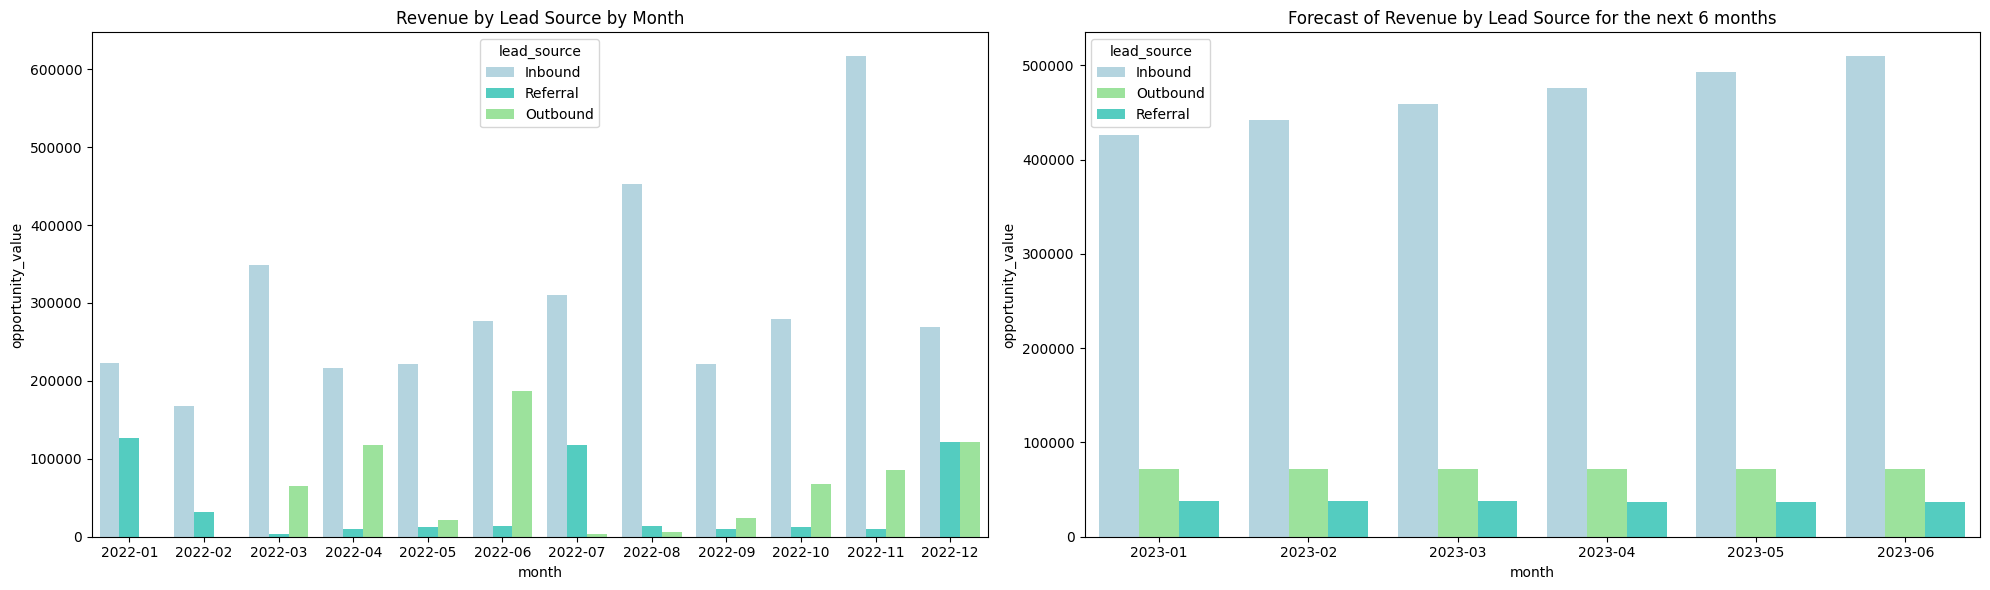

In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
forecast_data = df_filtered.groupby(['month', 'lead_source'])[['opportunity_value']].sum().reset_index()
palette = {"Inbound": "lightblue", "Referral": "turquoise", "Outbound": "lightgreen"}

plt.figure(figsize=(20, 6))

# Plotting the revenue by lead source by month
plt.subplot(1, 2, 1)
sns.barplot(data=forecast_data, x=forecast_data.month.astype(str), y='opportunity_value', hue='lead_source', palette=palette)
plt.title('Revenue by Lead Source by Month')

# Forcasting for the next 6 months using simple Linear Regression
lr = LinearRegression()

# Initialize an empty dataframe to store the forecasted values
forecast = pd.DataFrame()

# Iterate over each lead source
for source in forecast_data['lead_source'].unique():
    source_data = forecast_data[forecast_data['lead_source'] == source]
    
    # Converting the date to ordinal (numeric) for regression model
    X = source_data['month'].apply(lambda x: x.to_timestamp().toordinal()).values.reshape(-1, 1)
    y = source_data['opportunity_value']
    
    lr.fit(X, y)
    
    # Predict for the next 6 months
    next_6_months = pd.date_range(start=source_data['month'].max().to_timestamp(), periods=7, freq='M')[1:]
    next_6_months = next_6_months.map(dt.datetime.toordinal).values.reshape(-1, 1)
    predicted_values = lr.predict(next_6_months)
        
   
    forecast_source = pd.DataFrame({
        'month': [dt.datetime.fromordinal(i) for i in next_6_months.reshape(-1)],
        'opportunity_value': predicted_values,
        'lead_source': source
    })
    
    forecast = pd.concat([forecast, forecast_source])

# Ordering the dataframe by month and source
forecast.sort_values(by=['month', 'lead_source'], inplace=True)

# Plotting the forecast for the next 6 months
plt.subplot(1, 2, 2)
sns.barplot(data=forecast, x=forecast.month.dt.strftime("%Y-%m"), y='opportunity_value', hue='lead_source', palette=palette)
plt.title('Forecast of Revenue by Lead Source for the next 6 months')

plt.tight_layout()
plt.show()

----

In [ ]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Convert the period to datetime before plotting
conversion_rate['month'] = conversion_rate['month'].astype(str)

# Initiate subplots
fig = sp.make_subplots(rows=3, cols=1)

# Plotting the conversion rate for Inbound
fig.add_trace(go.Bar(x=conversion_rate['Inbound'], y=conversion_rate['month'], name = 'Inbound', orientation = 'h'), row = 1, col = 1)

# Update y axis range for Inbound
fig.update_xaxes(range=[0, 100], row=1, col=1)
             
# Plotting the conversion rate for Outbound
fig.add_trace(go.Bar(x=conversion_rate['Outbound'], y=conversion_rate['month'], name = 'Outbound', orientation = 'h'), row = 2, col = 1)

# Update y axis range for Outbound
fig.update_xaxes(range=[0, 100], row=2, col=1)
             
# Plotting the conversion rate for Referral
fig.add_trace(go.Bar(x=conversion_rate['Referral'], y=conversion_rate['month'], name = 'Referral', orientation = 'h'), row = 3, col = 1)
fig.update_xaxes(range=[0, 100], row=3, col=1)

<BR>

***Inbound is the main source of opportunities, representing 69.53% of all the incoming opportunity value.***

While inbound opportunities can be valuable and are often a sign of effective marketing and brand presence, depending exclusively on them may have some drawbacks. It's important to be aware and prepared for the fact that there's very limited control over the volume and quality of inbound opportunities, meaning that while some leads may be highly qualified and ready to convert, others may be less promising, resulting in a less predictable sales pipeline.

New high-quality opportunities may be missed without a proactive approach. Implementing proactive strategies, such as targeted outreach to potential clients or partnerships, can complement the passive inbound opportunities.

***Keeping the status quo, the trend suggests the highest growth in inbound incoming leads, widening the gap between the three distinct sources. Inferring from the low conversion rate might represent a problem.***

---


### Sales Team


---



***EMEA leads in income Opportunity Value but loses on conversion rate to AMER***

With the difference of 4% and -4% in conversion rate from the other territories (APAC 10%, EMEA 14%, and AMER 18%), this discrepancy raises considerations about potential variations in lead quality, market strategy, or sales training among the territories. 



In [ ]:
df_filtered = df[df['Territory'].isin(['EMEA', 'APAC', 'AMER'])]
closing_by_territory = df_filtered[df_filtered['stage'].isin(['Closed Won', 'Closed Lost'])].groupby(['stage', 'Territory']).sum()['opportunity_value'].unstack(level=0)
closing_by_territory = closing_by_territory.rename(columns={"Closed Won": "closed_won", "Closed Lost": "closed_lost"})
closing_by_territory['conversion_rate'] = closing_by_territory['closed_won'] / (closing_by_territory['closed_lost'] + closing_by_territory['closed_won'])
print(closing_by_territory.sort_values('conversion_rate', ascending=False))

stage      closed_lost  closed_won  conversion_rate
Territory                                          
AMER        1079845.10   249619.21         0.187759
EMEA        2045100.47   341656.41         0.143147
APAC         765088.12    89800.00         0.105043


In [ ]:
DeepnoteChart(df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"title":"Created Date"},"sort":"ascending","type":"nominal","field":"month","scale":{"type":"linear"},"stack":"zero"},"y":{"axis":{"title":"Opportunity value","format":".0f"},"sort":null,"type":"quantitative","field":"opportunity_value","scale":{"type":"linear"},"stack":"zero","format":{"type":"number","decimals":0},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"nominal","field":"Territory","scale":{"scheme":"paired"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

---

<BR>

***APAC and EMEA share similar contract values for closed won and closed lost cases.***
In EMEA 80% of closed won contracts are up to 11k, while closed lost contracts extend to 12k. APAC shows an 80% concentration in both closed won and closed lost contracts up to 9k.

***In AMER, a notable  difference emerges***
With closed won contracts going up to 13k and closed lost contracts reaching up to 58k. This discrepancy prompts further investigation into factors influencing these values.
It's worth noting that open opportunities fall outside this observed range, suggesting that larger opportunities might take longer to close. 

<img src="image-20231125-203121.png" width="100%" align="" />

---

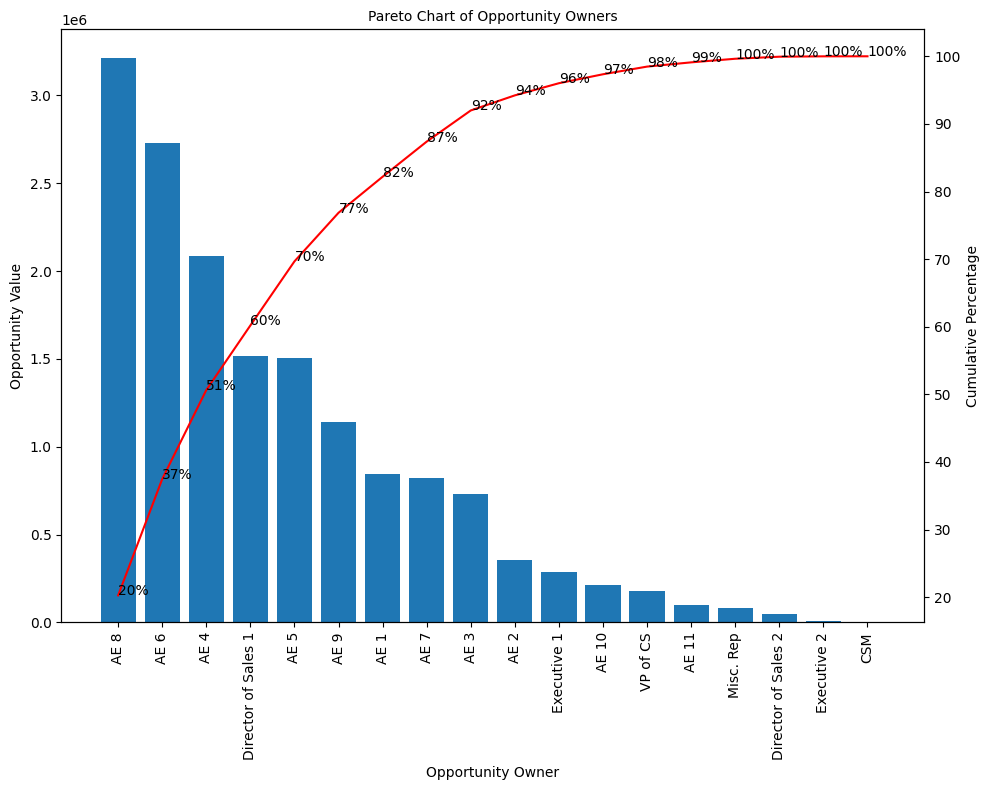

In [ ]:
amounts_by_owner = df.groupby('opportunity_owner')['opportunity_value'].sum().reset_index()
amounts_by_owner = amounts_by_owner.sort_values('opportunity_value', ascending=False)
amounts_by_owner['cumulative_percentage'] = amounts_by_owner['opportunity_value'].cumsum() / amounts_by_owner['opportunity_value'].sum() * 100

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.bar(amounts_by_owner['opportunity_owner'], amounts_by_owner['opportunity_value'])
ax1.set_xlabel('Opportunity Owner', fontsize=10)
ax1.set_ylabel('Opportunity Value', fontsize=10)
plt.xticks(rotation=90, fontsize=10)

ax2 = ax1.twinx()
ax2.plot(amounts_by_owner['opportunity_owner'], amounts_by_owner['cumulative_percentage'], color='red')

for i, j in zip(amounts_by_owner['opportunity_owner'], amounts_by_owner['cumulative_percentage']):
    ax2.annotate(str(round(j)) + "%", (i,j), fontsize=10)

ax2.set_ylabel('Cumulative Percentage', fontsize=10)

plt.title('Pareto Chart of Opportunity Owners', fontsize=10)
plt.tight_layout()
plt.show()

<br>
<br>

***20.27% of all incoming opportunities are attributed to a single employee***
This raises concerns about dependence. The potential departure or unavailability of this employee may pose challenges in replacing or replicating these opportunities.

***Discrepancies in performance among team members may signal an issue in knowledge management.***
When a single individual is accountable for a substantial portion of opportunities, it suggests that they possess unique insights and relationships critical to these opportunities. The concentrated knowledge presents a potential risk if it is not thoroughly documented or shared within the organization. Additionally, in client-related opportunities, relying heavily on one individual for client relationships may be perceived as a noteworthy concern.

---

### Recommendations

Cross-Training and Knowledge Sharing: Ensure the dissemination of critical knowledge and relationships among team members through structured training programs and comprehensive documentation.

Client Relationship Management: Establish robust processes for collectively managing and maintaining client relationships to mitigate the impact of individual turnover and ensure continuity in client engagement.

Continuous Monitoring: Conduct regular assessments of opportunity distribution, taking proactive measures to address any overreliance on specific individuals, and maintaining a balanced approach to business development.

Expand and Diversify Lead Sources: Broaden lead sources beyond inbound strategies by incorporating referrals and outbound efforts. This strategic shift aims to reduce dependence on passive leads, fostering a more diversified and stable revenue stream.

Improve Sales Training: Enhance the training of the sales team to better handle diverse opportunities, refine deal-closing skills, and improve lead qualification. This initiative is poised to elevate the team's effectiveness in converting opportunities.

Optimize Lead-to-Sales Owner Assignment: Implement a more evenly distributed system for assigning opportunities to the sales team. This not only reduces dependence on specific individuals but also enhances the likelihood of capturing a more extensive range of opportunities.

Invest More in High-Performing Segments: Prioritize marketing and sales efforts in segments such as 'Durables & Apparel,' 'Services,' and 'Food, Beverage & Tobacco' that have demonstrated high performance, aligning resources with areas of proven success.

Revise Forecasting Model: Consider revising or replacing the current Linear Regression model with a more sophisticated time series analysis. This adjustment accounts for the seasonality, trend, and cyclical nature of data, providing more accurate forecasts for informed decision-making.

Regular Reviews and Feedback: Establish a routine for assessing individual and team performance within the sales team. Regular feedback sessions not only identify strengths and weaknesses but also keep the team aligned with overarching company goals, fostering continuous improvement.

## Task 2: Consumption Analysis

Recommendations and growth potential for each customer, partner, and channel.
Create a dashboard with your key findings and KPIs.

> 1- How would you restructure the sheet, to make it more user-friendly?

- I would not use Excel to work with dim x fct or any more complex data. 
- Break it down into two different tables (dim with the information that is not monthly and fct with the info that it is). 
- Keep columns and rows always following the same pattern and on the same line

> 2- If this data is inside any traditional database (ANSI SQL compliant), how would you break it down into data models? What will be the dimensions of the dataset?

- One table for the fact info (monthly changing info) and one table for dimension info (Things that don't change or very rarely get updated), making sure that they have a common key. 

> 3- What will be the fact table and its SQL query to have faster results for the following need? 

A: Fact: "Month", "Calls", "Interval (60s /30s)", "Text conversations", and "customer ID" to be used as the key

> 4- We would like to understand (list) the top 3 biggest downgrades of the usage for each month per channel (calls/text conversations) of customer ID with its partners. 

*If there is no partner, it means that it is Parloa internal so please update the column as “Parloa”. With this list, our customer success managers and partners can communicate with the customer if there is a problem with the Parloa product.

In [2]:
fct = _deepnote_execute_sql('SELECT * \nFROM fact_table.csv', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
fct

,month,customer_id,Calls,Intervall (60s /30s),Text conversations
0,2022-09-01,10001,3597,8274,-
1,2022-09-01,10002,5684,13074,27
2,2022-09-01,10003,103484,238014,190
3,2022-09-01,10004,123456,283949,None
4,2022-09-01,10005,45698,105106,None
...,...,...,...,...,...
424,2023-09-01,10029,123440000,2725636,0
425,2023-09-01,10030,123450759,2725868,0
426,2023-09-01,10031,989817216,21855788,0
427,2023-09-01,10032,45007636,993800,0


In [3]:
dim = _deepnote_execute_sql('select * \nfrom dim_table.csv', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
dim

,customer_id,partner,Phone Connection,Tenios Account,Interval,€ /interval,€ / text conversation,Definition of text conversation,"Package (""Paket"")",Flatrate calls,Flatrate minutes / intervalls,Flatrate text conversations,Comments (e.g. definintion of text conversation)
0,10001,None,Tenios,203276.0,60 sec,None,None,N/A,10000 calls,None,None,None,None
1,10002,Grant Partnerships Inc,Tenios,203276.0,60 sec,0.054,-,None,5000 minutes,-,None,-,-
2,10003,None,N/A,NaN,No Phone,None,0.014,None,Paket: M (up to 100.000 Calls/conversations),None,None,50000,"24h interval, no turns specified"
3,10004,None,N/A,NaN,60 sec,0.054,None,N/A,10000,None,None,None,Extra cost occurs depending on the integration...
4,10005,None,Tenios,203793.0,30 sec,0.027,-,N/A,None,-,5000,-,-
5,10006,Best Case Partners,Tenios,203276.0,60 sec,0.094,0.014,None,None,-,12000,-,-
6,10007,Best Case Partners,Tenios,202283.0,30 sec,0.023,0.014,None,Up to 40000 calls/conversations,None,20000,None,None
7,10008,None,Direct SIP,NaN,30 sec,0.027,None,N/A,None,None,20000,None,from 01.08.2023 30sec price = 0.032€
8,10009,None,Tenios,203276.0,30 sec,0.027,None,N/A,None,None,10000,None,from 01.08.2023 30sec price = 0.032€
9,10010,None,Tenios,NaN,60 sec,0.024,0.012,Conversation = every 6 messages within a max o...,None,None,None,None,Conversation = every unique interaction in a 2...


In [5]:
df_5 = _deepnote_execute_sql('  WITH base AS(\n  SELECT\n    customer_id,\n    month,\n    Calls as calls, \n    "Intervall (60s /30s)" as intervall,\n    Calls / LAG("Calls") OVER (PARTITION BY customer_id ORDER BY month) - 1 AS calls_variation,\n    "Intervall (60s /30s)" / LAG("Intervall (60s /30s)") OVER (PARTITION BY customer_id ORDER BY month) - 1 AS intervall_variation\n  FROM\n    fct\n  )\n, ranked as (\n  SELECT \n    month\n    , customer_id \n    , CASE WHEN partner = \'None\' THEN \'Parloa\'\n            WHEN  partner is null THEN \'Parloa\' ELSE partner end as partner\n    , calls\n    , calls_variation\n    , intervall\n    , intervall_variation\n    , RANK() OVER (PARTITION BY month ORDER BY month, calls_variation DESC) AS downgrade_rank_calls\n    , RANK() OVER (PARTITION BY month ORDER BY month, intervall_variation DESC) AS downgrade_rank_intervall\n  FROM base\n  LEFT JOIN dim_table.csv using (customer_id)\n)\n\nSELECT * from ranked where downgrade_rank_calls <= 3 OR downgrade_rank_intervall <= 3', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_5

,month,customer_id,partner,calls,calls_variation,intervall,intervall_variation,downgrade_rank_calls,downgrade_rank_intervall
0,2023-06-01,10015,Future of Phone,19523241,5.545337,58028990,-0.360000,3,30
1,2023-06-01,10011,Smart Solutions,50207559,5.545338,149232102,-0.360000,1,31
2,2023-06-01,10010,Parloa,46894939,5.545337,139386004,-0.360000,2,32
3,2023-06-01,10012,Parloa,1321,5.539604,3930,-0.359935,32,1
4,2023-06-01,10014,Parloa,16089,5.542904,47808,-0.359983,31,2
...,...,...,...,...,...,...,...,...,...
167,2022-11-01,10012,Parloa,156,0.405405,297,0.112360,1,1
168,2022-11-01,10002,Grant Partnerships Inc,9789,0.400029,18600,0.108396,3,4
169,2022-11-01,10013,Parloa,22944,0.400049,43594,0.108360,2,6
170,2022-11-01,10014,Parloa,1904,0.400000,3618,0.108456,28,2


In [ ]:
DeepnoteChart(df_5, """{"mark":{"type":"bar","tooltip":true},"width":"container","config":{"customFormatTypes":true},"height":"container","$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"y":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}}}}""")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2254e57f-f4d0-4158-b195-020957cbda5d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>